In [1]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 합성 의료 데이터 생성
np.random.seed(42)

In [9]:
# 나이, 혈압, 콜레스테롤 등과 같은 특징을 갖는 환자 데이터 무작위 생성
num_patients = 1000
data = pd.DataFrame({
    'Age': np.random.randint(18, 80, num_patients),
    'BloodPressure': np.random.randint(90, 160, num_patients),
    'Cholesterol': np.random.randint(120, 240, num_patients),
    'BMI': np.random.uniform(18.5, 30, num_patients),
    'Smoker': np.random.choice([0, 1], num_patients),
    'Diabetes': np.random.choice([0, 1], num_patients)
})

In [10]:
# Q-learning 매개변수 정의
num_actions = 2  # 예: 0 - 치료 없음, 1 - 치료
num_states = len(data.columns) # 데이터셋의 특징을 기반으로 상태의 수
epsilon = 0.1 # 입실론-그리디 정책에 대한 탐험 비율
alpha = 0.1 # Q-값을 업데이트하는 데 사용되는 학습률
gamma = 0.9 # 즉각적인 보상과 미래 보상을 균형있게 고려하는 할인 계수
num_episodes = 500 # Q-러닝 알고리즘이 실행될 총 에피소드 수

In [11]:
# Q-테이블을 0으로 초기화
Q_table = np.zeros((num_states, num_actions))

In [12]:
# 입실론-그리디 정책을 기반으로 행동을 선택하는 함수 정의
def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(num_actions)  # 탐험
    else:
        return np.argmax(Q_table[state, :])  # 이용

In [13]:
# Q-러닝 업데이트 규칙을 사용하여 Q-값을 업데이트하는 함수 정의
def update_q_value(state, action, reward, next_state):
    max_next_state_value = np.max(Q_table[next_state, :])
    Q_table[state, action] = (1 - alpha) * Q_table[state, action] + \
                             alpha * (reward + gamma * max_next_state_value)

In [14]:
# Q-러닝 알고리즘
episode_rewards = []

for episode in range(num_episodes):
    total_reward = 0
    current_state = np.random.choice(num_states)

    while True:
        action = choose_action(current_state)
        # 데모 용도로 간단한 보상 함수 가정
        reward = np.random.normal(0, 1)

        total_reward += reward
        next_state = np.random.choice(num_states)

        update_q_value(current_state, action, reward, next_state)

        current_state = next_state

        if np.random.uniform(0, 1) < 0.05:  # 5%의 확률로 에피소드 종료
            break

    episode_rewards.append(total_reward)

    if episode % 5 == 0:  # 간략하게 하기 위해 출력 빈도 감소
        print(f"Episode {episode}, Total Reward: {total_reward}")

Episode 0, Total Reward: -0.040275304136156376
Episode 5, Total Reward: -11.434073059411652
Episode 10, Total Reward: -0.10700960302669016
Episode 15, Total Reward: 4.027021050054618
Episode 20, Total Reward: -2.238288341108044
Episode 25, Total Reward: -0.05964418404421612
Episode 30, Total Reward: 0.6104122689003646
Episode 35, Total Reward: 2.9869030489147934
Episode 40, Total Reward: -1.501100725531718
Episode 45, Total Reward: -0.11229643443825799
Episode 50, Total Reward: 4.958266657614765
Episode 55, Total Reward: 0.5723847881212931
Episode 60, Total Reward: -5.226389368736784
Episode 65, Total Reward: 1.1106949905347463
Episode 70, Total Reward: -1.3828394027464737
Episode 75, Total Reward: -5.774194408097951
Episode 80, Total Reward: -0.34376347057234125
Episode 85, Total Reward: 4.125455832887294
Episode 90, Total Reward: -9.457970717739475
Episode 95, Total Reward: 0.19711040527661255
Episode 100, Total Reward: -6.428270505528395
Episode 105, Total Reward: 0.2508359501999084

In [15]:
# 평가
average_reward = np.mean(episode_rewards)
print(f"\nAverage Reward per Episode: {average_reward}")


Average Reward per Episode: -0.20504993269299385


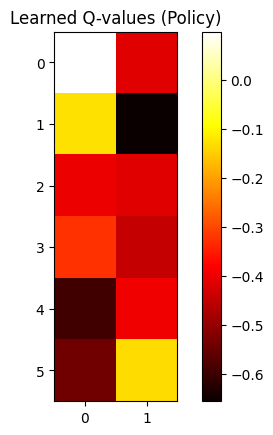

In [19]:
# 학습된 Q-값 또는 정책 시각화
plt.imshow(Q_table, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Learned Q-values (Policy)')
plt.show()

In [20]:
# 학습된 Q-값 출력
print("Learned Q-values:\n", Q_table)

Learned Q-values:
 [[ 0.09801671 -0.41396899]
 [-0.12772629 -0.65526761]
 [-0.40180469 -0.41251564]
 [-0.32463811 -0.44612302]
 [-0.59260752 -0.39442681]
 [-0.53852529 -0.13296503]]
